In [1]:
from os import listdir
from os.path import isfile,join

In [2]:
import pandas as pd

In [3]:
import re
from copy import deepcopy 
from collections import defaultdict

In [4]:
def file_names(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return onlyfiles

In [5]:
import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [6]:
# f = pd.read_csv("/home/karan/Doing/Tagged/70689-5266692.csv")

In [7]:
# f = f[~pd.isnull(f["tags"])]

In [8]:
max_len=0

In [9]:
words=[]
tags=[]
pos_tags=[]
bold = []
font_size = []

In [10]:
wordsUnique=""
tagsUnique=""
posUnique=""
boldUnique=""
fsizeUnique=""

In [11]:
def colonToSYM(x):
    if x==":":
        return "SYM"
    else:
        return x

In [12]:
def lower1(x):
    return str(x).lower()

In [13]:
from collections import Counter
def combineFiles():
    global wordsUnique,tagsUnique,posUnique,boldUnique,fsizeUnique,max_len
    c=0
    err = []
    for fname in file_names("/home/karan/Doing/tagall/"):
        try:
            f = pd.read_csv("/home/karan/Doing/tagall/"+fname)
            f = f[~pd.isnull(f["tags"]) & ~((f["tags"]==" ") | (f["tags"]=="  "))]   # Take tagged data i.e. Education Section
            f["POStags"] = f["POStags"].apply(colonToSYM)
            f["datam"] = f["datam"].apply(lower1)
            if c==0:
                wordsUnique=Counter(f["datam"])
                tagsUnique=Counter(f["tags"])
                posUnique=Counter(f["POStags"])
#                 boldUnique=Counter(f["bold"])
#                 fsizeUnique=Counter(f["fontsize"])
            else:
                wordsUnique += Counter(f["datam"])
                tagsUnique += Counter(f["tags"])
                posUnique += Counter(f["POStags"])
#                 boldUnique += Counter(f["bold"])
#                 fsizeUnique += Counter(f["fontsize"])
            words.append(list(f["datam"]))
            tags.append(list(f["tags"]))  
            pos_tags.append(list(f["POStags"]))
#             bold.append(list(f["bold"]))
#             font_size.append(list(f["fontsize"]))
            c+=1
            max_len =max(max_len,len(f["datam"]))
            if sum(f["tags"]==" ")>0:
                print fname
        except Exception as e:
            print "Not processed ",fname
            print "Mess",e.message
            err.append(fname)
    print "Max",max_len
        

In [14]:
combineFiles()

Not processed  174077-14148391.csv
Mess tags


/home/karan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6


Not processed  174077-14012434.csv
Mess datam
Not processed  174077-14035924.csv
Mess tags
Not processed  174077-14134493.csv
Mess datam
Not processed  174077-14101638.csv
Mess tags
Not processed  70689-15597262.csv
Mess tags
Not processed  121408-10241076.csv
Mess tags
Not processed  121408-10276224.csv
Mess datam
Not processed  174077-14163131.csv
Mess tags


/home/karan/anaconda2/lib/python2.7/site-packages/pandas/core/ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


Not processed  70689-13634657.csv
Mess invalid type comparison
Not processed  174077-14087323.csv
Mess datam
Not processed  174077-14082247.csv
Mess tags
Not processed  174077-14082239.csv
Mess datam
Not processed  121408-10284025.csv
Mess tags
Not processed  174077-14110680.csv
Mess datam
Not processed  70689-15626563.csv
Mess tags
Not processed  121408-10271130.csv
Mess datam
Not processed  174077-13958509.csv
Mess datam
Not processed  174077-14162989.csv
Mess tags
Not processed  174077-14085602.csv
Mess datam
Not processed  174077-13973926.csv
Mess tags
Not processed  121408-10077362.csv
Mess tags
Not processed  174077-14107786.csv
Mess datam
Not processed  174077-14218384.csv
Mess datam
Not processed  174077-14139242.csv
Mess tags
Not processed  174077-13956856.csv
Mess tags
Not processed  174077-14202784.csv
Mess datam
Not processed  121408-10113874.csv
Mess datam
Not processed  70695-5517164.csv
Mess tags
Not processed  174077-14166325.csv
Mess tags
Not processed  121408-10059228

In [15]:
# df = pd.read_csv("/home/karan/Doing/taggedB/174077-14107804.csv")


In [16]:
'''
a="!$&\()*+,-;<=>?@[\\]^_`{}~"
c=0
for x in words:
    for y in x:
        for z in range(len(y)):
            if y[z] in a:
                if  (z!=0) and (z!=len(y)-1) and (y[z-1] in "1234567890") and (y[z+1] in "1234567890"):
                    continue
                c+=1
                print y
print c,"Count"
'''

'\na="!$&\\()*+,-;<=>?@[\\]^_`{}~"\nc=0\nfor x in words:\n    for y in x:\n        for z in range(len(y)):\n            if y[z] in a:\n                if  (z!=0) and (z!=len(y)-1) and (y[z-1] in "1234567890") and (y[z+1] in "1234567890"):\n                    continue\n                c+=1\n                print y\nprint c,"Count"\n'

In [17]:
# df[~pd.isnull(df["tags"]) & ~(df["tags"]==" ")]

In [18]:
'''
We made an array for all the words and tags present in our cvs.
'''

'\nWe made an array for all the words and tags present in our cvs.\n'

In [19]:
len(posUnique)

34

In [20]:
posUnique

Counter({nan: 2,
         '$': 1,
         '(': 2,
         'CC': 240,
         'CD': 1383,
         'DT': 120,
         'FW': 1,
         'IN': 1760,
         'JJ': 405,
         'JJR': 5,
         'JJS': 6,
         'MD': 3,
         'NN': 1948,
         'NNP': 8260,
         'NNPS': 48,
         'NNS': 240,
         'OTH': 62,
         'POS': 3,
         'PRP': 7,
         'PRP$': 4,
         'RB': 16,
         'RBR': 2,
         'RP': 3,
         'SYM': 185,
         'TO': 48,
         'UH': 1,
         'VB': 11,
         'VBD': 89,
         'VBG': 108,
         'VBN': 45,
         'VBP': 23,
         'VBZ': 18,
         'WDT': 5,
         'WP': 1})

In [21]:
tagsUnique

Counter({' BDEG': 1,
         'BBRD': 56,
         'BBRMA': 351,
         'BBRMI': 47,
         'BDATE': 228,
         'BDATE ': 1,
         'BDEG': 608,
         'BGRD': 18,
         'BINST': 942,
         'BLOC': 86,
         'IBMRI': 7,
         'IBRD': 127,
         'IBRMA': 642,
         'IBRMA ': 1,
         'IBRMI': 139,
         'IDATE': 340,
         'IDEG': 1543,
         'IGRD': 19,
         'III': 1,
         'IIINST': 4,
         'IINST': 2306,
         'ILOC': 97,
         'O': 4646,
         'O ': 27,
         'UBGD': 1,
         'UBRD': 60,
         'UBRMA': 91,
         'UBRMI': 7,
         'UDATE': 544,
         'UDEG': 842,
         'UDGE': 1,
         'UDGRD': 1,
         'UDTE': 1,
         'UGED': 1,
         'UGRD': 414,
         'UGRS': 1,
         'UINST': 108,
         'ULOC': 745,
         'URGD': 1})

In [22]:
noOfDocs = len(tags)

In [23]:
noOfDocs

478

In [24]:
words1 = deepcopy(words)

In [25]:
flag=0
sub="&amp;"
sub1="&amp"
def datacleaning(arr):
	global flag
	for x in range(len(arr)):
		for y in range(len(arr[x])):
			flag=0
			if len(arr[x][y])==1:
				continue
			elif arr[x][y]=="":
				arr[x][y]="#"
				continue
			else:
				#for the first character
				if arr[x][y][0]=='(':
					if arr[x][y][-1]==')':
						print arr[x][y]," to ",
						arr[x][y]=arr[x][y][1:]
						arr[x][y]=arr[x][y][:-1]
						print arr[x][y]
					else:
						for i in range(len(arr[x][y])-1) :
							if arr[x][y][i]==')':
								flag=1
								break
						if flag==0 :
							arr[x][y]=arr[x][y][1:]
					flag=0
				elif not(arr[x][y][0].isalpha()) and not(arr[x][y][0].isdigit()):
					arr[x][y]=arr[x][y][1:]	

				#for last character
				if arr[x][y][-1]==')':
					if arr[x][y][0]=='(':
						arr[x][y]=arr[x][y][1:]
						arr[x][y]=arr[x][y][:-1]
					else:
						for i in range(1,len(arr[x][y])) :
							if arr[x][y][i]=='(':
								flag=1
								break
						if flag==0 :
							arr[x][y]=arr[x][y][:-1]
					flag=0
                    
				if '"' in arr[x][y]:
					arr[x][y]=arr[x][y].replace('"','')
				elif arr[x][y]=="":
					arr[x][y]="#"

				elif arr[x][y][-1]=='%':
					pass
				elif not(arr[x][y][-1].isalpha()) and not(arr[x][y][-1].isdigit()):
					arr[x][y]=arr[x][y][:-1]

				if sub in arr[x][y]:
					arr[x][y]=arr[x][y].replace(sub,'&')
				if sub1 in arr[x][y]:
					arr[x][y]=arr[x][y].replace(sub1,'&')
	
	c=0
	for x in range(len(arr)):
		for y in range(len(arr[x])):
			if arr[x][y]=="":
				arr[x][y]="#"
	return arr

In [26]:
datacleaning(words)

(hons)  to  hons
(hons)  to  hons
(cbse)  to  cbse
(cbse)  to  cbse
(declared)  to  declared
(intended)  to  intended
(nitk)  to  nitk
(saca)  to  saca
(cs)  to  cs
(puc)  to  puc
(sslc)  to  sslc
(pcm)  to  pcm
(mpbse)  to  mpbse
(cbse)  to  cbse
(cbse)  to  cbse
(computers)  to  computers
(b.e)  to  b.e
(rgpv)  to  rgpv
(selenium)  to  selenium
(w.b.c.h.s.e)  to  w.b.c.h.s.e
(w.b.b.s.e)  to  w.b.b.s.e
(rohtak)  to  rohtak
(b.tech)  to  b.tech
(vtu)  to  vtu
(patna)  to  patna
(patna)  to  patna
(b.e)  to  b.e
(2005-2008)  to  2005-2008
(2002-2005)  to  2002-2005
(1999-2002)  to  1999-2002
(c.s.e.)  to  c.s.e.
(ece)  to  ece
(must)  to  must
(2012-2013)  to  2012-2013
(bca)  to  bca
(cse)  to  cse
(piet)  to  piet
(mca)  to  mca
(jntuhyderabad)  to  jntuhyderabad
(b.tech.)  to  b.tech.
(m.s.)  to  m.s.
(b.e.)  to  b.e.
(ece)  to  ece
(mca)  to  mca
(pcms)  to  pcms
(hons.)  to  hons.
(hons.)  to  hons.
(usc)  to  usc
(ece)  to  ece
(cbse)  to  cbse
(cbse)  to  cbse
(c.b.s.e)  to  c.b.

[['m.e',
  'in',
  'computer',
  'science',
  'and',
  'engineering',
  'at',
  'sathyabama',
  'institute',
  'of',
  'science',
  'and',
  'technology',
  'chennai',
  'first',
  'class',
  '70.90%',
  'in',
  'may',
  '2006',
  '#',
  'b.e',
  'in',
  'electronics',
  'and',
  'communication',
  'from',
  'muthayammal',
  'engineering',
  'college',
  'rasipuram',
  'first',
  'class',
  '70.62%',
  'in',
  'may',
  '2004',
  '#',
  'diploma',
  'in',
  'electronics',
  'and',
  'communication',
  'from',
  'muthayammal',
  'polytechnic',
  'college',
  'rasipuram',
  'first',
  'class',
  'with',
  'honors',
  '90.08%',
  'in',
  'april',
  '2001'],
 ['bachelor',
  'of',
  'science',
  'in',
  'horticulture',
  'bachelor',
  'of',
  'science',
  'in',
  'marine',
  'and',
  'coastal',
  'reserve',
  'management',
  'bachelor',
  'of',
  'science',
  'in',
  'medicine',
  'bachelor',
  'of',
  'science',
  'in',
  'midwifery',
  'bachelor',
  'of',
  'science',
  'in',
  'mining',
 

In [27]:
# ls=[]
# for x in words:
#     for y in x:
#         ls.append(y)


In [28]:
# pd.DataFrame(ls).to_csv("wordsAfterClean.csv")

In [29]:
c=0
for i in range(len(words)):
    for j in range(len(words[i])):
        if words[i][j][-1] in [')'] and '(' not in words[i][j] and len(words[i][j])>1:
            print words[i][j]
            words[i][j]=words[i][j][:-1]
            print words[i][j]
        elif words[i][j][-1]==":" and len(words[i][j])>1:
            print words[i][j]
            words[i][j] = words[i][j][:-1]
            print words[i][j]
        elif words[i][j][0]=="(" and words[i][j][-1]==")":
            print words[i][j]
            words[i][j] = words[i][j][1:-1]
            print words[i][j]
print c

2012)
2012
3.5/4.0)
3.5/4.0
system)
system
(2008-2012)
2008-2012
(distinction)
distinction
(2006-2009)
2006-2009
(2005-2006)
2005-2006
(2002-2003)
2002-2003
2013)
2013
maths)
maths
74%)
74%
(2004)
2004
profile:
profile
profile:
profile
proficiency:
proficiency
10)
10
(%)
%
(%)
%
university)
university
(autonomous)
autonomous
0


In [30]:
c=0
for i in range(len(words)):
    for j in range(len(words[i])):
        if words[i][j][0] in [",",".","/","'",":",";","(",")"] and len(words[i][j])>1:
            print words[i][j]
#             words[i][j]=words[i][j][1:]
            c+=1
        elif words[i][j][-1] in [",",".","/","'",":",";","(",")"] and len(words[i][j])>1:
            print words[i][j]
#             words[i][j]=words[i][j][:-1]
            c+=1
print c

actionuri(https://devmountain.com/)
dip.engg.
abet(aicte)
m.p.
actionuri(https://github.com/slime9/109final)
5


In [31]:
wordsUnique=defaultdict()

In [32]:
for word in words:
    for x in word:
        if x not in wordsUnique:
            wordsUnique[x]=1
        else:
            wordsUnique[x]+=1

In [33]:
len(wordsUnique)

3331

In [34]:
wordsUnique

defaultdict(None,
            {'trenton': 1,
             'banasthali': 5,
             'visveswariah': 1,
             'icsenew': 1,
             'assembler': 1,
             'four': 1,
             'bmsc': 1,
             'circuitry': 1,
             'asian': 2,
             'guwahati': 1,
             'collagerajkotgujarat': 1,
             'aug': 16,
             'jaipur': 11,
             'punjab': 4,
             'dausa': 1,
             'values-driven': 1,
             '7.62': 1,
             'brilliant': 1,
             'matlab': 3,
             '7.67': 1,
             'under': 9,
             'jagannath': 1,
             'kota': 2,
             'suarashtra': 1,
             'xth': 3,
             '@': 1,
             'chennai': 14,
             'risk': 1,
             'commerce': 6,
             'regional': 1,
             '74.56%': 1,
             'every': 1,
             'blittcelt': 1,
             'picazo': 2,
             'physicchemistrymathscomputer': 1,
             'c

In [35]:
len(words)

478

In [36]:
sum(len(x) for x in words)

15055

In [37]:
tagsUnique=defaultdict()

In [38]:
def conv():
    i=0
    while(1):
        ind=0
        for tg in tags[i]:
            if tg=='BDATE ':
                tags[i][ind]="BDATE"
            elif tg=='URGD':
                tags[i][ind]="UGRD"
            elif tg=='UDG' or tg == 'UDGE':
                tags[i][ind]="UDEG"
            elif tg=='IBMRI':
                tags[i][ind] = "IBRMI"
            elif tg=='INST' or tg == 'III':
                tags[i][ind] = "IINST"
            elif tg=='UDGRD' or tg=='UGED' or tg=='UGRS':
                tags[i][ind] = 'UGRD'
            elif tg=='O ':
                tags[i][ind] = 'O'
            elif tg== ' BDEG':
                tags[i][ind]="BDEG"
            elif tg=='IIINST':
                tags[i][ind]="IINST"
            elif tg=='IBRMA ':
                tags[i][ind] = "IBRMA"
            elif tg=='BBRMA ' or tg=='BIBRMA':
                tags[i][ind] = "BBRMA"
            elif tg=='ULCO':
                tags[i][ind] = 'ULOC'
            elif tg=='UDTE' or tg=='UDATEO':
                tags[i][ind] = 'UDATE'
                
            ind+=1
        i+=1
        if (i>=noOfDocs):
            break
            

In [39]:
conv()

In [40]:
def conv2():
    i=0
    while(1):
        ind=0
        for tg in tags[i]:
            if "DATE" in tg:
                tags[i][ind]="O"
            elif "LOC" in tg:
                tags[i][ind]="O"
            elif "BRD" in tg:
                tags[i][ind]="O"
            elif "BBRMA" in tg:
                tags[i][ind]="O"
            elif "BBRMI" in tg:
                tags[i][ind]="O"
            elif "IBRMA" in tg:
                tags[i][ind]="O"
            elif "IBRMI" in tg:
                tags[i][ind]="O"
            elif "UBRMA" in tg:
                tags[i][ind]="O"
            elif "UBRMI" in tg:
                tags[i][ind]="O"
            elif "GRD" in tg:
                tags[i][ind]="O"
            elif "UBGD" in tg:
                tags[i][ind]="O"
            else:
                pass
            ind+=1
        i+=1
        for x in tags[i-1]:
            if x not in tagsUnique:
                tagsUnique[x]=1
            else:
                tagsUnique[x]+=1
        if (i>=noOfDocs):
            break

In [41]:
conv2()

In [42]:
tagsUnique

defaultdict(None,
            {'BDEG': 609,
             'BINST': 942,
             'IDEG': 1543,
             'IINST': 2311,
             'O': 8699,
             'UDEG': 843,
             'UINST': 108})

In [43]:
#sum(tagsUnique[x] for x in tagsUnique)

In [44]:
len(wordsUnique)

3331

In [45]:
len(tagsUnique)

7

In [46]:
wuniq = wordsUnique.keys()

In [47]:
tuniq = tagsUnique.keys()

In [48]:
tuniq = [x[0] + "-" + x[1:] if (x!="O") else x for x in tuniq]

In [49]:
puniq = posUnique.keys()

In [50]:
import pickle

In [51]:
f = open("testWuniq.txt",'r')
wtuniq = pickle.load(f)
f.close()

f1 = open("testPuniq.txt",'r')
ptuniq = pickle.load(f1)
f1.close()

In [52]:
for x in wtuniq:
    if x not in wuniq:
        wuniq.append(x)

In [53]:
for x in ptuniq:
    if x not in puniq:
        puniq.append(x)

In [54]:
wuniq.append("ENDPAD")

In [55]:
tags1=[]

In [56]:
for tg in tags:
    tags1.append([x[0] + "-" + x[1:] if (x!="O") else x for x in tg])

In [57]:
tags=tags1

In [58]:
max_len = 125

In [59]:
f = open("finalWuniq.txt",'w')
pickle.dump(wuniq,f)
f.close()

f1 = open("finalPuniq.txt",'w')
pickle.dump(puniq,f1)
f1.close()

In [60]:
word2idx = {w: i for i, w in enumerate(wuniq)}
tag2idx = {t: i for i, t in enumerate(tuniq)}
pos2idx = {p: i for i, p in enumerate(puniq)}

In [61]:
from keras.preprocessing.sequence import pad_sequences

In [62]:
n_words = len(wuniq)

In [63]:
n_words

3542

In [64]:
n_tags = len(tagsUnique)

In [65]:
n_pos = len(puniq)

In [66]:
# wuniq[3860]

In [67]:
# n_fonts = len(funiq)

In [68]:
X_words = [[word2idx[w] for w in s] for s in words]

In [69]:
X_pos = [[pos2idx[w] for w in s] for s in pos_tags]

In [70]:
# X_font = [[fsize2idx[w] for w in s] for s in font_size]

In [71]:
y = [[tag2idx[w] for w in s] for s in tags]

In [72]:
X_words = pad_sequences(maxlen=max_len, sequences=X_words, padding="post", value=n_words-1)  # n_words-1 because if n_words is given then the system cannot locate the n_wordTH index in X bcoz indices of words list exist only from 0 to n_word-1. 

In [73]:
X_pos = pad_sequences(maxlen=max_len, sequences=X_pos, padding="post", value=pos2idx["$"])  # n_words-1 because if n_words is given then the system cannot locate the n_wordTH index in X bcoz indices of words list exist only from 0 to n_word-1. 

In [74]:
# X_font = pad_sequences(maxlen=max_len, sequences=X_font, padding="post", value=0)  # n_words-1 because if n_words is given then the system cannot locate the n_wordTH index in X bcoz indices of words list exist only from 0 to n_word-1. 

In [75]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [76]:
y.shape

(478, 125)

In [77]:
from keras.utils import to_categorical

In [78]:
# X_font = [to_categorical(i, num_classes=n_fonts) for i in X_font]

In [79]:
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [80]:
np.array(y).shape

(478, 125, 7)

In [81]:
X_tr1 = X_pos

In [82]:
X_tr = X_words

In [83]:
y_tr1 = y

In [84]:
y_tr = y

In [85]:
# X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X_pos, y, test_size=0.15,random_state=42)

In [86]:
# X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X_font, y, test_size=0.15,random_state=42)

In [87]:
# X_tr, X_te, y_tr, y_te = train_test_split(X_words, y, test_size=0.15,random_state=42)

In [88]:
f = open("testDataPos.txt",'r')
X_te1 = pickle.load(f)
f.close()

f1 = open("testDataY.txt",'r')
y_te = pickle.load(f1)
f1.close()

f2 = open("testDataWords.txt",'r')
X_te = pickle.load(f2)
f2.close()

In [89]:
np.array(y_tr).shape

(478, 125, 7)

In [90]:
import keras
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras_contrib.layers import CRF

In [91]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))

In [92]:
word_input = Input(shape=(max_len,))
word_emb = Embedding(input_dim=(n_words+250), output_dim=110,
                     input_length=max_len)(word_input)

pos_input = Input(shape=(max_len,))
pos_emb = Embedding(input_dim=(n_pos+5), output_dim=15,
                    input_length=max_len)(pos_input)

# font_input = Input(shape=(max_len,))
# font_emb = Embedding(input_dim=n_fonts, output_dim=15,
#                     input_length=max_len)(font_input)


model = keras.layers.concatenate([word_emb, pos_emb])
# model = Bidirectional(LSTM(units=50, return_sequences=True,
#                            recurrent_dropout=0.1))(model)

# model = Embedding(input_dim=n_words, output_dim=110, input_length=max_len)(input)

model = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(model)
# model = MaxPooling1D(pool_size=1)(model)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer
crf = CRF(n_tags)  # CRF layer
out = crf(model)

In [93]:
model = Model([word_input,pos_input], out)

In [94]:
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])

In [95]:
X_tr.shape

(478, 125)

In [96]:
np.array(y_tr).shape

(478, 125, 7)

In [97]:
history = model.fit([X_tr,X_tr1], np.array(y_tr), batch_size=5, epochs=40, validation_split=0.1, verbose=1)

Train on 430 samples, validate on 48 samples
Epoch 1/40
430/430 [==============================] - 28s 66ms/step - loss: 0.9001 - viterbi_acc: 0.8923 - val_loss: 0.7409 - val_viterbi_acc: 0.8937
Epoch 2/40
430/430 [==============================] - 28s 64ms/step - loss: 0.6178 - viterbi_acc: 0.8936 - val_loss: 0.5101 - val_viterbi_acc: 0.8937
Epoch 3/40
430/430 [==============================] - 27s 62ms/step - loss: 0.4329 - viterbi_acc: 0.8936 - val_loss: 0.3723 - val_viterbi_acc: 0.8937
Epoch 4/40
430/430 [==============================] - 27s 62ms/step - loss: 0.3289 - viterbi_acc: 0.8936 - val_loss: 0.3005 - val_viterbi_acc: 0.8937
Epoch 5/40
430/430 [==============================] - 27s 63ms/step - loss: 0.2690 - viterbi_acc: 0.8938 - val_loss: 0.2462 - val_viterbi_acc: 0.8937
Epoch 6/40
430/430 [==============================] - 27s 63ms/step - loss: 0.2252 - viterbi_acc: 0.8944 - val_loss: 0.2201 - val_viterbi_acc: 0.8980
Epoch 7/40
430/430 [==============================] - 2

In [864]:
import matplotlib.pyplot as plt

In [865]:
%matplotlib inline

In [866]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'acc'

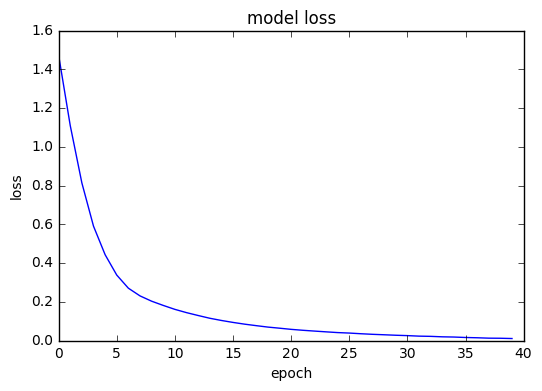

In [867]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# history = model.fit(X_tr, np.array(y_tr), batch_size=32, epochs=100, validation_split=0.1, verbose=1)

In [98]:
i = 3
y_pred = model.predict([np.array([X_te[i]]),np.array([X_te1[i]])])
p= y_pred
p = np.argmax(p, axis=-1)

In [99]:
np.argmax(y_pred[0], axis=-1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 0, 0, 1, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [100]:
np.argmax(y_te[i], axis=-1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [101]:
y_true = y_te[i]

In [102]:
X_te[1]

array([ 651,  530,  579, 2454, 2586, 2359, 1275, 3286,  651, 1583,  510,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541, 3541,
       3541, 3541, 3541, 3541], dtype=int32)

In [103]:
y_pred[0]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,

In [104]:
np.array(y_true)

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,

In [105]:
print("{:15} : {}".format("Word", "Pred"))
for w, pred in zip(X_te[i], p[0]):
    print("{:15}: {}".format(wuniq[w], tuniq[pred]))

Word            : Pred
years          : O
of             : O
study          : O
name           : O
of             : O
degree         : O
institute      : O
/              : O
university     : O
marks          : O
%              : O
2006-2009      : O
mca            : U-DEG
guru           : B-INST
jambheshwar    : I-INST
university     : I-INST
hisar          : B-DEG
haryana        : I-DEG
india          : O
59%            : O
years          : O
of             : O
study          : O
name           : O
of             : O
degree         : O
institute      : O
/              : O
university     : O
marks          : O
%              : O
2000-2003      : O
b.com          : U-DEG
mds            : B-INST
university     : I-INST
ajmer          : O
51%            : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPA

In [106]:
output = pd.DataFrame(columns=["words","pos","correct","predicted"])

In [107]:
for i in range(len(X_te)):
    y_pred = model.predict([np.array([X_te[i]]),np.array([X_te1[i]])])
    p= y_pred
    p = np.argmax(p, axis=-1)
    for x in range(len(X_te[i])):
        output = output.append({"words":wuniq[X_te[i][x]],"pos":puniq[X_te1[i][x]],"correct":tuniq[np.argmax(y_te[i],axis=-1)[x]],"predicted":tuniq[p[0][x]]},ignore_index=True)
    output = output[~(output["words"]=="ENDPAD")]
#     output = output.append({"words":"-X-","pos":"","correct":"","predicted":""},ignore_index=True)

In [108]:
output = output.reset_index(drop=True)

In [109]:
for i in range(len(output["words"])):
    if len(output["words"].iloc[i].split(" "))>1:
        output["words"].iloc[i] = (output["words"].iloc[i]).replace(" ","")

In [110]:
output.to_csv("outputdeginstagain1.txt",sep=" ",index=False,header=False)

In [ ]:
-----------------Checking Normalisation-----------------------------------

In [111]:
def newData(df,fname,iterNo):
    doc1 = []
    predN1 = []
    global wuniq,puniq,model,X_tr,X_tr1
    newUWords = list(df["data"].unique())
    newUTags = list(df["POStags"].unique())
    newWords = list(df["data"])
    newPOSTags = list(df["POStags"])
    datacleaning([newWords])
    datacleaning([newUWords])
    for x in newUWords:
        if x not in wuniq:
            print "yes ",x
            wuniq.append(x)
    for x in newUTags:
        if x not in puniq:
            print "pos new",x
            puniq.append(x)
    word2idx = {w: i for i, w in enumerate(wuniq)}
    pos2idx = {p: i for i, p in enumerate(puniq)}
    X_new = [[word2idx[w] for w in newWords]]
    X_postags = [[pos2idx[w] for w in newPOSTags]]
    X_new = pad_sequences(maxlen=max_len, sequences=X_new, padding="post", value=word2idx["ENDPAD"])
    X_postags = pad_sequences(maxlen=max_len, sequences=X_postags, padding="post", value=pos2idx["$"])
    X_tr = np.concatenate((X_tr,X_new))
    print len(X_tr)
    X_tr1 = np.concatenate((X_tr1,X_postags))
    y_pred = model.predict([X_new,X_postags])
    p= y_pred
    p = np.argmax(p, axis=-1)
    print p[0]
    for w, pred in zip(X_new[0],p[0]):
        if wuniq[w]!="ENDPAD":
            doc1.append(wuniq[w])
            predN1.append(tuniq[pred])
        print("{:15}: {}".format(wuniq[w], tuniq[pred]))
    print "------------"
#     print doc1
#     print predN1
    temp = pd.DataFrame(doc1,columns=["data"])
    temp["pred"] = predN1
    temp.to_csv("/home/karan/FinalModel/Predictions/Set"+str(iterNo)+"/"+fname)

In [284]:
path = "/home/karan/FinalModel/CleanPredictions/checkOn/Set12/"
filesDone=0
iterNo=12
for fname in file_names(path):
    df = pd.read_csv(path+fname)
    df = df[~pd.isnull(df["data"])]
    df["POStags"] = df["POStags"].apply(colonToSYM)
    df["data"] = df["data"].apply(lower1)
    newData(df,fname,iterNo)
    filesDone+=1

809
[6 0 0 1 2 2 2 3 3 3 3 3 3 3 3 3 6 0 0 0 0 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 6 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
university     : B-INST
of             : I-INST
redlands       : I-INST
master         : B-DEG
of             : I-DEG
business       : I-DEG
administration : I-DEG
emphasis       : O
-              : O
marketing      : O
redlands       : O
ca             : O
june           : O
2016           : O
-              : O
present        : O
saint          : B-INST
mary's         : I-INST
college        : I-INST
of             : I-INST
california     : I-INST
b.a            : U-DEG
kinesiology    : O
sports         : O
and            : O
recreation     : O
management     : O
minor          : O
business       : O
administration : O
moraga         : O
ca             : O
aug            : O
2011           : O
-              : O
may            :

In [285]:
def reTrain(iterNo):
    global y_tr
    pos2idx = {p: i for i, p in enumerate(puniq)}
    n_words = len(wuniq)
    n_pos = len(puniq)
    for x in file_names("/home/karan/FinalModel/Cleaned/Set"+str(iterNo)+"/"):
        df1 = pd.read_csv("/home/karan/FinalModel/Cleaned/Set"+str(iterNo)+"/"+x)
        print df1
        y_new = df1["new"]
        y_new2 = [[tag2idx[w] for w in y_new]]
        y_new2 = pad_sequences(maxlen=max_len, sequences=y_new2, padding="post", value=tag2idx["O"])
        y_new2 = [to_categorical(i, num_classes=n_tags) for i in y_new2]
        y_tr = np.concatenate((y_tr,y_new2))
    print len(y_tr)
#         history = model.fit([X_tr,X_tr1], np.array(y_tr), batch_size=5, epochs=20, validation_split=0.1, verbose=1)

In [286]:
reTrain(12)
n_words = len(wuniq)
n_pos = len(puniq)

    Unnamed: 0            data     old     new
0            0      university  B-INST  B-INST
1            1              of  I-INST  I-INST
2            2        redlands  I-INST  I-INST
3            3          master   B-DEG   B-DEG
4            4              of   I-DEG   I-DEG
5            5        business   I-DEG   I-DEG
6            6  administration   I-DEG   I-DEG
7            7        emphasis       O       O
8            8               -       O       O
9            9       marketing       O       O
10          10        redlands       O       O
11          11              ca       O       O
12          12            june       O       O
13          13            2016       O       O
14          14               -       O       O
15          15         present       O       O
16          16           saint  B-INST  B-INST
17          17          mary's  I-INST  I-INST
18          18         college  I-INST  I-INST
19          19              of  I-INST  I-INST
20          2

In [287]:
len(X_tr)

838

In [288]:
len(y_tr)

838

In [289]:
import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [290]:
word_input = Input(shape=(max_len,))
word_emb = Embedding(input_dim=(n_words+250), output_dim=110,
                     input_length=max_len)(word_input)

pos_input = Input(shape=(max_len,))
pos_emb = Embedding(input_dim=(n_pos+5), output_dim=15,
                    input_length=max_len)(pos_input)

# font_input = Input(shape=(max_len,))
# font_emb = Embedding(input_dim=n_fonts, output_dim=15,
#                     input_length=max_len)(font_input)


model = keras.layers.concatenate([word_emb, pos_emb])
# model = Bidirectional(LSTM(units=50, return_sequences=True,
#                            recurrent_dropout=0.1))(model)

# model = Embedding(input_dim=n_words, output_dim=110, input_length=max_len)(input)

model = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(model)
model = Dropout(0.1)(model)
# model = MaxPooling1D(pool_size=1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer
crf = CRF(n_tags)  # CRF layer
out = crf(model)

In [291]:
model = Model([word_input,pos_input], out)

In [292]:
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])

In [293]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 125)          0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           (None, 125)          0                                            
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 125, 110)     536910      input_25[0][0]                   
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 125, 15)      600         input_26[0][0]                   
__________________________________________________________________________________________________
concatenat

In [294]:
history = model.fit([X_tr,X_tr1], np.array(y_tr), batch_size=5, epochs=40, validation_split=0.05, verbose=1)

Train on 796 samples, validate on 42 samples
Epoch 1/40
796/796 [==============================] - 55s 69ms/step - loss: 0.7504 - viterbi_acc: 0.9091 - val_loss: 0.4504 - val_viterbi_acc: 0.9396
Epoch 2/40
796/796 [==============================] - 50s 63ms/step - loss: 0.3714 - viterbi_acc: 0.9098 - val_loss: 0.2241 - val_viterbi_acc: 0.9396
Epoch 3/40
796/796 [==============================] - 50s 63ms/step - loss: 0.2270 - viterbi_acc: 0.9105 - val_loss: 0.1441 - val_viterbi_acc: 0.9429
Epoch 4/40
796/796 [==============================] - 51s 64ms/step - loss: 0.1756 - viterbi_acc: 0.9188 - val_loss: 0.1173 - val_viterbi_acc: 0.9549
Epoch 5/40
796/796 [==============================] - 50s 62ms/step - loss: 0.1481 - viterbi_acc: 0.9338 - val_loss: 0.1013 - val_viterbi_acc: 0.9598
Epoch 6/40
796/796 [==============================] - 50s 63ms/step - loss: 0.1247 - viterbi_acc: 0.9448 - val_loss: 0.0909 - val_viterbi_acc: 0.9617
Epoch 7/40
796/796 [==============================] - 5

In [295]:
output = pd.DataFrame(columns=["words","pos","correct","predicted"])

In [296]:
for i in range(len(X_te)):
    y_pred = model.predict([np.array([X_te[i]]),np.array([X_te1[i]])])
    p= y_pred
    p = np.argmax(p, axis=-1)
    for x in range(len(X_te[i])):
        output = output.append({"words":wuniq[X_te[i][x]],"pos":puniq[X_te1[i][x]],"correct":tuniq[np.argmax(y_te[i],axis=-1)[x]],"predicted":tuniq[p[0][x]]},ignore_index=True)
    output = output[~(output["words"]=="ENDPAD")]
#     output = output.append({"words":"-X-","pos":"","correct":"","predicted":""},ignore_index=True)

In [297]:
output = output.reset_index(drop=True)

In [298]:
for i in range(len(output["words"])):
    if len(output["words"].iloc[i].split(" "))>1:
        print "here!"
        output["words"].iloc[i] = (output["words"].iloc[i]).replace(" ","")

here!
here!
here!


In [299]:
output.to_csv("outputdeginstagain1.txt",sep=" ",index=False,header=False)

In [584]:
f = open("FinX_tr.txt","w")
pickle.dump(X_tr,f)
f.close()

f = open("FinX_tr1.txt","w")
pickle.dump(X_tr1,f)
f.close()

f = open("Finy.txt","w")
pickle.dump(y_tr,f)
f.close()